In [1]:
# ! pip install torchsummary
# ! pip3 install ipywidgets --user
# ! pip install seaborn
# ! pip install albumentations

In [2]:
import sys
sys.path.append('../')

In [23]:
from utils.data import CIFAR10_dataset
from utils.misc import (
    show_random_images,
    get_device,
    set_seed,
    is_cuda,
    show_model_summary,
    show_img_grid,
    show_random_images_for_each_class,
    get_wrong_predictions
)
from utils.model import Net
from utils.training import train
from utils.testing import test

In [4]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim
import numpy as np

### Device

In [5]:
set_seed()
cuda = is_cuda()
device = get_device()

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


## Data Loader

In [6]:
train_loader = CIFAR10_dataset(
    train=True, cuda=cuda
).get_loader()
test_loader = CIFAR10_dataset(
    train=False, cuda=cuda
).get_loader()

Extracting ./data/cifar-10-python.tar.gz to ./data

        [INFO] train dataset of size 50000 loaded...
        
Files already downloaded and verified

        [INFO] test dataset of size 10000 loaded...
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


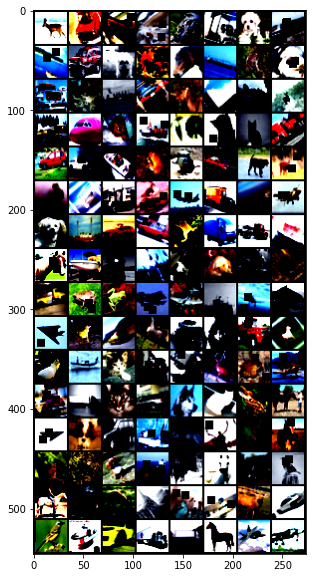

In [7]:
show_random_images(train_loader)

## Load Model

In [8]:
from tqdm.notebook import tqdm
import pandas as pd

In [43]:
experiments= [
    {'BN': True, 'GN': False, 'LN': False, 'L1': False, 'L2': False},
]
EPOCHS = 75
# results = {}
# models = {}
for exp in experiments:
#     exp_name = ""
#     for param, val in exp.items():
#         if val:
#             exp_name += f"{param}__"
#     exp_name = exp_name.strip('__')
#     print("Experiment : ", exp_name)
#     results[exp_name] = {
#         'train_loss': [],
#         'train_acc': [],
#         'test_loss': [],
#         'test_acc': [],
#         'epoch': [],
#     }

#     net = Net(
#         dropout_value=0.1, BN=exp['BN'], GN=exp['GN'], LN=exp['LN']
#     ).to(device)
#     show_model_summary(net, input_size=(3, 32, 32))

#     weight_decay = 1e-5 if exp['L2'] else 0
#     optimizer = optim.SGD(
#         net.parameters(), 
#         lr=0.015, momentum=0.9, 
#         weight_decay=weight_decay
#     )
#     lr_scheduler = ReduceLROnPlateau(
#         optimizer, mode='min', factor=0.5, 
#         patience=2, min_lr=0.001, verbose=True
#     )

    for epoch in tqdm(range(50, EPOCHS + 1)):
        print(f"[EPOCH {epoch} / {EPOCHS}] -- ")
        train_loss_batch, train_acc_batch = train(
            net, device, 
            train_loader, 
            optimizer, 
            lr_scheduler,
            L1=exp['L1']
        )
        train_acc = np.mean(train_acc_batch)
        train_loss = np.mean(train_loss_batch)

        test_loss, test_acc = test(
            net, device, 
            test_loader,
            lr_scheduler
        )
        for metric in ['train_loss', 'train_acc', 'test_loss', 'test_acc', 'epoch']:
            results[exp_name][metric].append(eval(metric))
    
    models[exp_name] = net

[EPOCH 50 / 75] -- 




Test set: Average loss: 0.6868, Accuracy: 7613/10000 (76.13%)

[EPOCH 51 / 75] -- 



Epoch    53: reducing learning rate of group 0 to 1.0000e-03.

Test set: Average loss: 0.6765, Accuracy: 7630/10000 (76.30%)

[EPOCH 52 / 75] -- 




Test set: Average loss: 0.6720, Accuracy: 7672/10000 (76.72%)

[EPOCH 53 / 75] -- 




Test set: Average loss: 0.6769, Accuracy: 7658/10000 (76.58%)

[EPOCH 54 / 75] -- 




Test set: Average loss: 0.6745, Accuracy: 7642/10000 (76.42%)

[EPOCH 55 / 75] -- 




Test set: Average loss: 0.6739, Accuracy: 7644/10000 (76.44%)

[EPOCH 56 / 75] -- 




Test set: Average loss: 0.6696, Accuracy: 7666/10000 (76.66%)

[EPOCH 57 / 75] -- 




Test set: Average loss: 0.6763, Accuracy: 7652/10000 (76.52%)

[EPOCH 58 / 75] -- 




Test set: Average loss: 0.6742, Accuracy: 7667/10000 (76.67%)

[EPOCH 59 / 75] -- 




Test set: Average loss: 0.6733, Accuracy: 7666/10000 (76.66%)

[EPOCH 60 / 75] -- 




Test set: Average loss: 0.6647, Accuracy: 7683/10000 (76.83%)

[EPOCH 61 / 75] -- 




Test set: Average loss: 0.6740, Accuracy: 7673/10000 (76.73%)

[EPOCH 62 / 75] -- 




Test set: Average loss: 0.6683, Accuracy: 7679/10000 (76.79%)

[EPOCH 63 / 75] -- 




Test set: Average loss: 0.6683, Accuracy: 7684/10000 (76.84%)

[EPOCH 64 / 75] -- 




Test set: Average loss: 0.6627, Accuracy: 7715/10000 (77.15%)

[EPOCH 65 / 75] -- 




Test set: Average loss: 0.6552, Accuracy: 7732/10000 (77.32%)

[EPOCH 66 / 75] -- 




Test set: Average loss: 0.6714, Accuracy: 7677/10000 (76.77%)

[EPOCH 67 / 75] -- 




Test set: Average loss: 0.6633, Accuracy: 7686/10000 (76.86%)

[EPOCH 68 / 75] -- 




Test set: Average loss: 0.6623, Accuracy: 7708/10000 (77.08%)

[EPOCH 69 / 75] -- 




Test set: Average loss: 0.6694, Accuracy: 7672/10000 (76.72%)

[EPOCH 70 / 75] -- 




Test set: Average loss: 0.6550, Accuracy: 7737/10000 (77.37%)

[EPOCH 71 / 75] -- 




Test set: Average loss: 0.6620, Accuracy: 7719/10000 (77.19%)

[EPOCH 72 / 75] -- 




Test set: Average loss: 0.6616, Accuracy: 7703/10000 (77.03%)

[EPOCH 73 / 75] -- 




Test set: Average loss: 0.6696, Accuracy: 7688/10000 (76.88%)

[EPOCH 74 / 75] -- 




Test set: Average loss: 0.6681, Accuracy: 7682/10000 (76.82%)

[EPOCH 75 / 75] -- 




Test set: Average loss: 0.6638, Accuracy: 7692/10000 (76.92%)




In [44]:
pd.DataFrame(results['BN'])

,train_loss,train_acc,test_loss,test_acc,epoch
0,1.872547,23.852525,1.609751,41.76,1
1,1.608449,40.157887,1.413768,48.11,2
2,1.502973,44.112907,1.306573,52.81,3
3,1.420764,47.788242,1.237456,55.96,4
4,1.369054,50.544972,1.175633,57.73,5
...,...,...,...,...,...
72,0.892850,68.725719,0.662048,77.19,71
73,0.894352,68.378680,0.661636,77.03,72
74,0.893864,68.888658,0.669642,76.88,73
75,0.895574,68.759452,0.668070,76.82,74


In [45]:
exp_results = []
for experiment, result in results.items():
    print(experiment)
    df = pd.DataFrame(result)
    df['experiment_name'] = experiment
    exp_results.append(df)
exp_results_df = pd.concat(exp_results)

BN


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

Text(0.5, 1.0, 'Testing Loss')

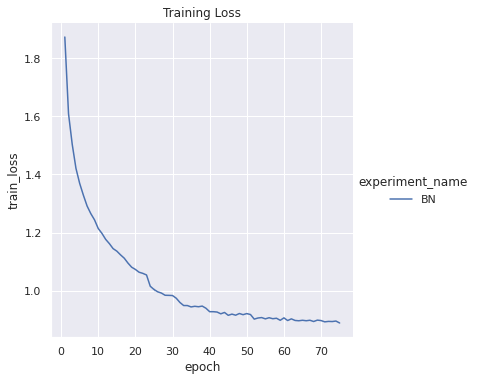

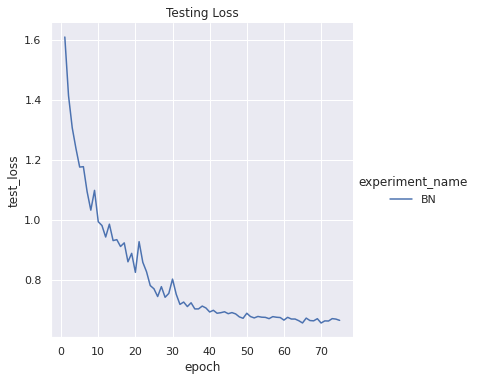

In [47]:
sns.relplot(data=exp_results_df, kind="line", x='epoch', y='train_loss', hue='experiment_name')
plt.title("Training Loss")
sns.relplot(data=exp_results_df, kind="line", x='epoch', y='test_loss', hue='experiment_name')
plt.title("Testing Loss")

Text(0.5, 1.0, 'Testing Accuracy')

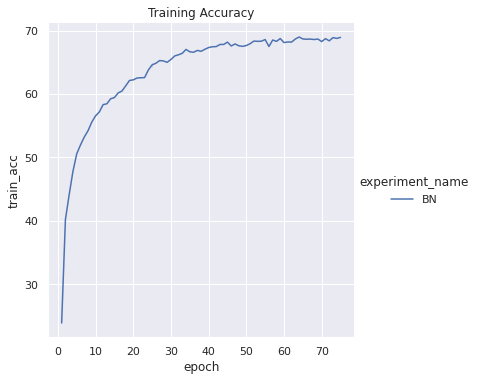

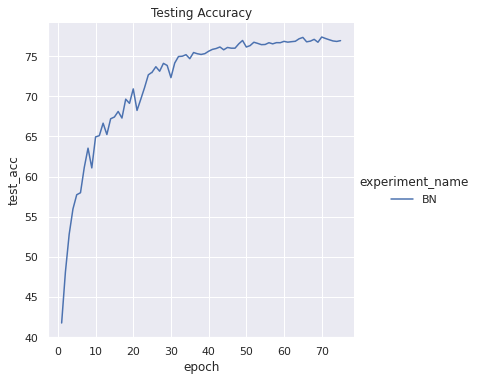

In [48]:
sns.relplot(data=exp_results_df, kind="line", x='epoch', y='train_acc', hue='experiment_name')
plt.title("Training Accuracy")
sns.relplot(data=exp_results_df, kind="line", x='epoch', y='test_acc', hue='experiment_name')
plt.title("Testing Accuracy")

In [49]:
import torch
import torchvision
%matplotlib inline

def get_wrong_predictions(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    wrong_correct = []
    wrong_predicted = []
    wrong_image_data = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            status = pred.eq(target.view_as(pred))
            # correct += status.sum().item()

            mistakes, _ = torch.where(status==False)
            if len(mistakes):
                m_data = data[mistakes]
                m_target = target[mistakes]
                m_output = output[mistakes]
                m_pred = pred[mistakes]
                correct = [x.item() for x in m_target.cpu().detach()]
                predicted = [x.item() for x in m_pred.cpu().detach()]
                image_data = [x for x in m_data.cpu().detach()]

                wrong_correct.extend(correct)
                wrong_predicted.extend(predicted)
                wrong_image_data.extend(image_data)
    
    return wrong_correct, wrong_predicted, wrong_image_data


def show_grid(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')


def show_wrong_images(targets, predicts, images, size=20, grid=(5, 4)):
    img_data_temp = []
    wps = []
    for n, (wc, wp, wi) in enumerate(zip(targets, predicts, images)):
        wps.append(wp)
        img_data_temp.append(wi)
        if n>18:
            break
    
    wrong_images_temp = torch.stack(img_data_temp)
    print()
    print(f"Mistakenly predicted as {wps}")

    grid_img = torchvision.utils.make_grid(wrong_images_temp, nrow=grid[0])
    show_grid(grid_img)

In [50]:
# Find 20 misclassified images for each of the 3 models, and show them as a 5x4 image matrix in 3 separately annotated images. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Mistakenly predicted as [4, 7, 8, 4, 5, 3, 9, 9, 0, 3, 7, 6, 3, 3, 5, 5, 8, 9, 9, 6]


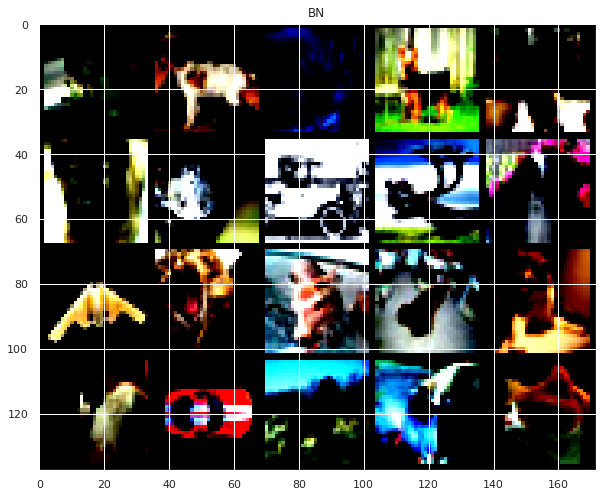

In [51]:
plt.figure(figsize=(10, 10))
targets, predicts, images = get_wrong_predictions(model, test_loader)
show_wrong_images(targets, predicts, images)
plt.title(experiment)
plt.show()